               0         1         2           3           4
0           0.00 -1.256673  2.876746    0.000000    0.000000
1           0.02 -1.145857  2.904938    0.000000    0.000000
2           0.04 -1.442611  2.958937    0.000000    0.000000
3           0.06 -1.408506  3.115770    0.000000    0.000000
4           0.08 -1.625154  2.966884    0.000000    0.000000
...          ...       ...       ...         ...         ...
499996   9999.92  0.546589 -0.688546  101.459452  464.297264
499997   9999.94  0.424935 -0.560326   96.506836  464.297264
499998   9999.96  0.406328 -0.626155   95.796874  464.297264
499999   9999.98  0.239127 -0.611944   90.430562  464.297264
500000  10000.00  0.491399 -0.692378   99.159062  464.297264

[500001 rows x 5 columns]
1.697875740164566
1.5639042568246981


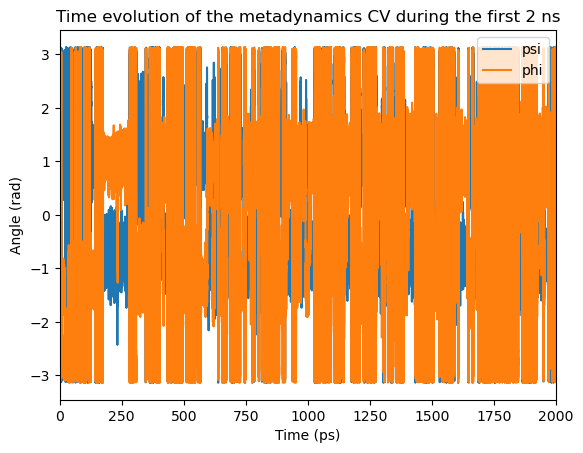

/state/partition1/job-26381515/ipykernel_1125502/1171219815.py:32: RuntimeWarning: divide by zero encountered in log
  H=-np.log(H)


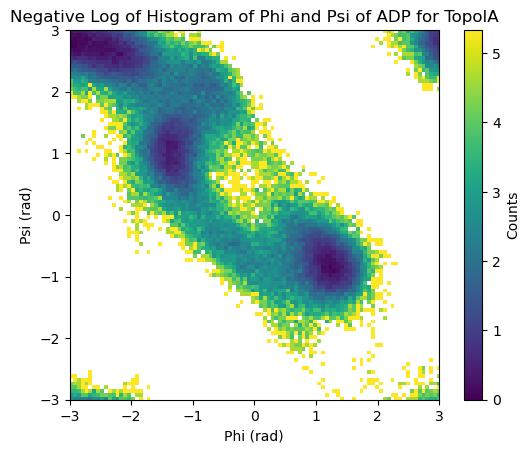

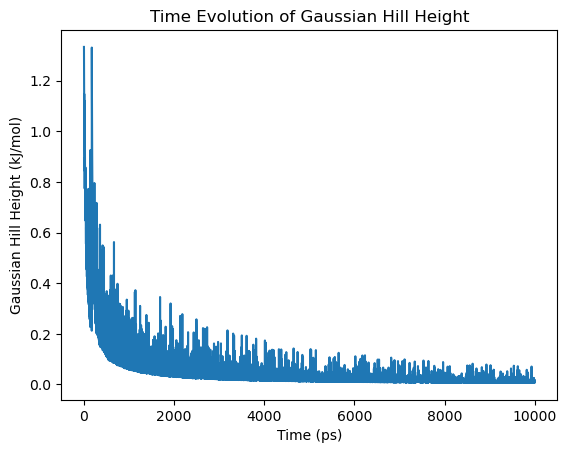

[[-3.14159265e+00  1.07644805e+02  4.85316698e+01]
 [-3.03326187e+00  1.12379816e+02  3.88765190e+01]
 [-2.92493109e+00  1.16019847e+02  2.83060917e+01]
 [-2.81660031e+00  1.18512403e+02  1.78337374e+01]
 [-2.70826953e+00  1.19916774e+02  8.37003025e+00]
 [-2.59993875e+00  1.20394533e+02  6.95170877e-01]
 [-2.49160797e+00  1.20163448e+02 -4.64971067e+00]
 [-2.38327718e+00  1.19498175e+02 -7.34062915e+00]
 [-2.27494640e+00  1.18680561e+02 -7.43991382e+00]
 [-2.16661562e+00  1.17982810e+02 -5.31863081e+00]
 [-2.05828484e+00  1.17604650e+02 -1.67375292e+00]
 [-1.94995406e+00  1.17656855e+02  2.50419768e+00]
 [-1.84162328e+00  1.18143961e+02  6.15596490e+00]
 [-1.73329250e+00  1.18945106e+02  8.28749744e+00]
 [-1.62496172e+00  1.19857255e+02  8.12581551e+00]
 [-1.51663094e+00  1.20604612e+02  5.33817874e+00]
 [-1.40830016e+00  1.20910429e+02  7.94427390e-02]
 [-1.29996937e+00  1.20537867e+02 -7.11148280e+00]
 [-1.19163859e+00  1.19320923e+02 -1.53794864e+01]
 [-1.08330781e+00  1.17202073e+

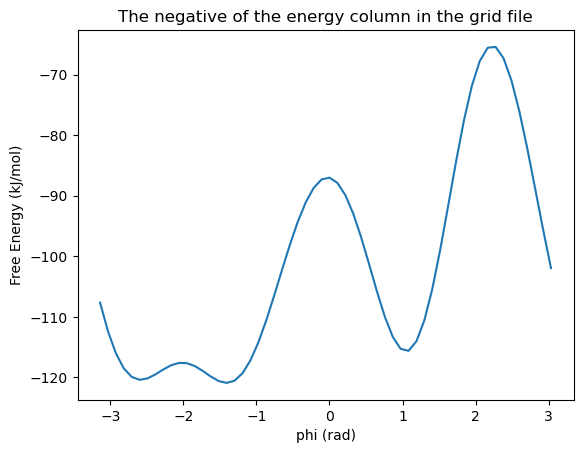

In [38]:
# this notebook is for plotting the end to end analysis and radius of gyration
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt

#load mdtraj
import mdtraj as md
import os

dataA = pd.read_csv('./COLVAR_A', header=None, delim_whitespace=True,skiprows=5)
A_phi_std = dataA[1].std()
print(dataA)
print(A_phi_std)
A_psi_std= dataA[2].std()
print(A_psi_std)

#plot
plt.plot(dataA[0][0:100001],dataA[2][0:100001],label="psi")
plt.plot(dataA[0][0:100001],dataA[1][0:100001],label="phi")
plt.legend(loc="upper right")
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
plt.title('Time evolution of the metadynamics CV during the first 2 ns')
plt.xlim([0,2000])
plt.savefig('Time evolution of the metadynamics CV during the first 2 ns.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

H, xedges, yedges = np.histogram2d(dataA[1][0:100001], dataA[2][0:100001], bins=100, normed=True)
H=H.T
H=-np.log(H)
H=H-H.min()
plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
plt.title('Negative Log of Histogram of Phi and Psi of ADP for TopolA')
plt.xlim([-3,3])
plt.ylim([-3,3])
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
# plt.savefig('Negative Log of Histogram of Phi and Psi of ADP for TopolA.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

hill_A = pd.read_csv('./HILLS_A', header=None, delim_whitespace=True,skiprows=5)
plt.plot(hill_A[0],hill_A[3])
plt.xlabel('Time (ps)')
plt.ylabel('Gaussian Hill Height (kJ/mol)')
plt.title('Time Evolution of Gaussian Hill Height')
plt.savefig('Time Evolution of Gaussian Hill Height.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

grid_A=np.loadtxt("topolA.grid.dat",skiprows=5)
print(grid_A)
print(grid_A[:,0])
plt.plot(grid_A[:,0],-1*grid_A[:,1])
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('The negative of the energy column in the grid file')
plt.show()

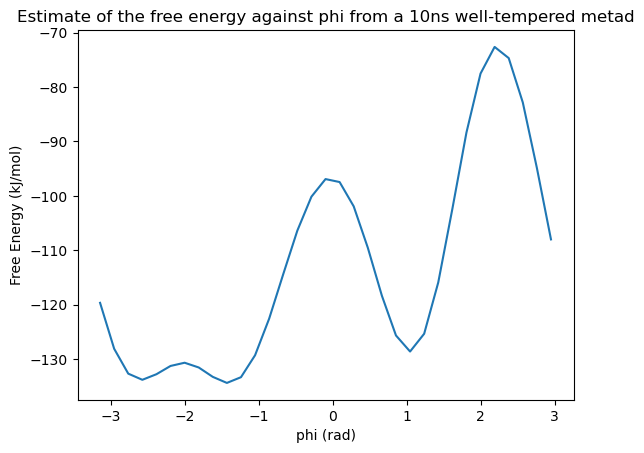

In [42]:
fes=np.loadtxt("fes.dat",skiprows=5)
plt.plot(fes[:,0],fes[:,1])
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Estimate of the free energy against phi from a 10ns well-tempered metad')
plt.show()

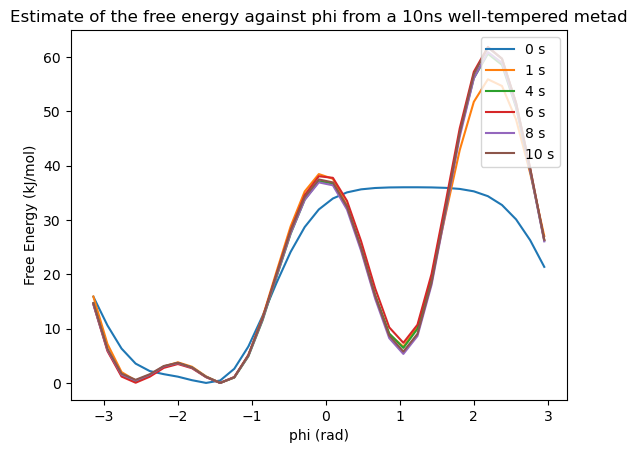

In [48]:
fes0=np.loadtxt("fes_0.dat",skiprows=5)
fes10=np.loadtxt("fes_10.dat",skiprows=5)
fes40=np.loadtxt("fes_40.dat",skiprows=5)
fes60=np.loadtxt("fes_60.dat",skiprows=5)
fes80=np.loadtxt("fes_80.dat",skiprows=5)
fes100=np.loadtxt("fes_100.dat",skiprows=5)
plt.plot(fes0[:,0],fes0[:,1],label="0 s")
plt.plot(fes10[:,0],fes10[:,1],label="1 s")
plt.plot(fes40[:,0],fes40[:,1],label="4 s")
plt.plot(fes60[:,0],fes60[:,1],label="6 s")
plt.plot(fes80[:,0],fes80[:,1],label="8 s")
plt.plot(fes100[:,0],fes100[:,1],label="10 s")
plt.legend(loc="upper right")
plt.xlabel('phi (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Estimate of the free energy against phi from a 10ns well-tempered metad')
plt.show()